# My riad challenge

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
# from sklearn.tree import export_graphviz
# from sklearn import tree
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from statsmodels.tsa.arima_model import ARIMA
import collections
from scipy.cluster.hierarchy import dendrogram, linkage
import numpy as np
from sklearn.decomposition import PCA

In [2]:
df1=pd.read_csv('MyriadChallenge/TrainMyriad.csv')
dftest=pd.read_csv('MyriadChallenge/TestMyriad.csv')

In [3]:
df1.describe()

,0,1,2,3,4,5,6,7,8,9,...,244,245,246,247,248,249,250,251,252,Class
count,5000.000000,5000.000000,5000.000000,5.000000e+03,5.000000e+03,5000.000000,5.000000e+03,5.000000e+03,5.000000e+03,5000.000000,...,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03,5000.000000,5000.000000,5000.000000,5000.000000
mean,0.000486,0.001032,0.001140,7.375817e-04,4.459286e-04,0.000237,8.479412e-04,1.308039e-03,9.231755e-04,0.000316,...,0.000285,0.000430,0.001387,0.000536,0.000192,9.216463e-04,0.000796,0.000325,0.000477,0.489400
std,0.022064,0.024896,0.022821,2.281738e-02,2.269435e-02,0.023668,2.315789e-02,2.310966e-02,2.291001e-02,0.022837,...,0.021994,0.022217,0.022296,0.023514,0.021520,2.250196e-02,0.021300,0.023569,0.023480,0.499938
min,-0.193774,-0.191102,-0.139600,-3.816964e-01,-2.283394e-01,-0.232066,-2.335412e-01,-1.844170e-01,-2.428337e-01,-0.182250,...,-0.337433,-0.137577,-0.179889,-0.227332,-0.138384,-2.072785e-01,-0.149109,-0.185041,-0.239711,0.000000
25%,-0.008880,-0.008409,-0.008510,-8.872927e-03,-8.683706e-03,-0.009016,-8.697229e-03,-8.425944e-03,-8.296891e-03,-0.008705,...,-0.008948,-0.009055,-0.008167,-0.008997,-0.008965,-8.153697e-03,-0.008501,-0.009011,-0.008921,0.000000
50%,0.000000,0.000000,0.000000,1.000000e-10,1.500000e-10,0.000000,1.000000e-10,5.000000e-10,1.000000e-10,0.000000,...,0.000000,-0.000000,0.000360,0.000000,0.000000,1.000000e-10,0.000000,0.000000,-0.000000,0.000000
75%,0.009719,0.010044,0.009643,9.812382e-03,1.003389e-02,0.009271,1.018698e-02,1.067033e-02,9.931832e-03,0.009547,...,0.009287,0.009685,0.010718,0.009564,0.009604,1.007285e-02,0.009921,0.009582,0.009870,1.000000
max,0.230594,0.404144,0.247719,1.979167e-01,2.180451e-01,0.305483,2.560722e-01,2.219020e-01,1.985068e-01,0.280512,...,0.210317,0.265522,0.171965,0.343498,0.154339,2.005155e-01,0.174033,0.587822,0.287783,1.000000


In [4]:
x_tr=df1.drop(columns=['Class'])
y_tr=df1['Class']

# Decision tree

In [5]:
X_train, X_test, y_train, y_test = train_test_split(x_tr, y_tr, random_state=1 )

# Armando un simple arbol de decisión
tree = DecisionTreeClassifier(max_depth=15, random_state=0)
tree.fit(X_train, y_train)
print('Precisión modelo inicial train/test  {0:.3f}/{1:.3f}'
      .format(tree.score(X_train, y_train), tree.score(X_test, y_test)))

Precisión modelo inicial train/test  0.979/0.514


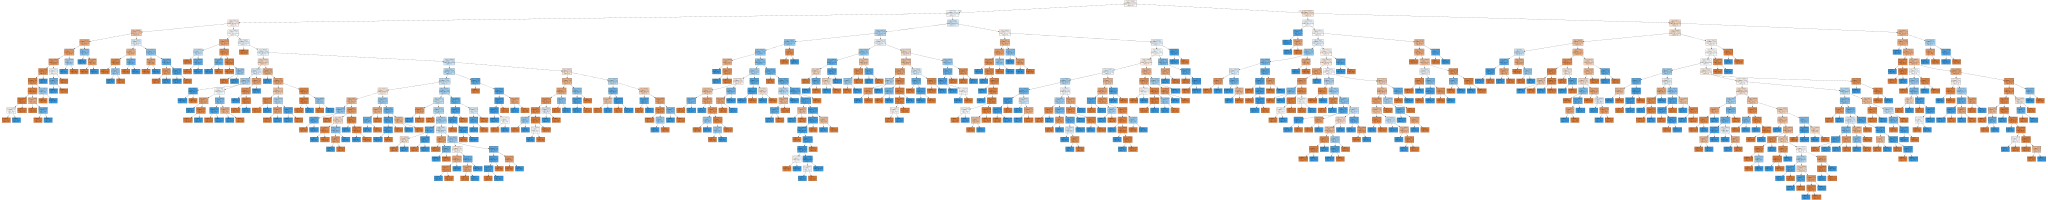

In [63]:
import graphviz
# Dibujando el modelo
export_graphviz(tree, out_file="tree.dot", class_names=["0", "1"],
feature_names=x_tr.columns.values, impurity=False, filled=True)

# with open("tree.dot") as f:
#     dot_graph = f.read()
# graphviz.Source(dot_graph)


# Ada boosting

In [68]:
ada = AdaBoostClassifier(base_estimator=tree, n_estimators=50, 
                         learning_rate=1.5, random_state=1)
# Ajustando los datos
ada = ada.fit(X_train, y_train)

In [71]:
# Imprimir la precisión.
y_train_pred = ada.predict(X_train)
y_test_pred = ada.predict(X_test)
ada_train = accuracy_score(y_train, y_train_pred)
ada_test = accuracy_score(y_test, y_test_pred)
print('Precisión modelo con AdaBoost train/test  {0:.3f}/{1:.3f}'
      .format(ada_train, ada_test))

Precisión modelo con AdaBoost train/test  1.000/0.502


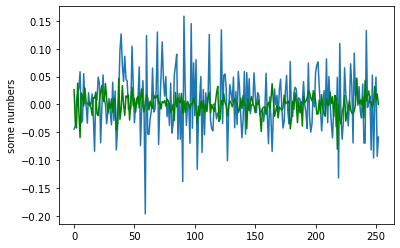

1.0 1.0


In [7]:
x=df1.iloc[500].values
x1=df1.iloc[4000].values

plt.plot(x1[:len(x)-1])
plt.plot(x[:len(x)-1],c='g')
plt.ylabel('some numbers')
plt.show()
print(x[-1],x1[-1])

# SVM



In [15]:
from sklearn import svm
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [23]:
svc=svm.SVC()
param_grid = {'kernel':['linear','rbf','poly'], 'C':[1,10,1000], 'gamma':['scale', 'auto']}

In [24]:
svc_cv = GridSearchCV(svc, param_grid, cv=10)

In [25]:
svc_cv.fit(x_tr, y_tr)
svc_cv.best_score_


0.5284

In [26]:
svc_cv.best_params_

{'C': 1000, 'gamma': 'scale', 'kernel': 'rbf'}